In [1]:
#Install mlxtend
!pip install mlxtend

In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix

In [3]:
#import churn dataset
churn_data = pd.read_csv("C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D208/churn_clean.csv")

churn_data.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#check for duplicate values
print(churn_data.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [5]:
#check for missing values
churn_data.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [6]:
#change the "None" value in column InternetService to "Not Provided" because we need that data without it appearing as null
churn_data['InternetService'] = churn_data['InternetService'].fillna('Not Provided')

In [7]:
#verify change worked correctly
churn_data['InternetService'].head(10)

0     Fiber Optic
1     Fiber Optic
2             DSL
3             DSL
4     Fiber Optic
5    Not Provided
6             DSL
7             DSL
8             DSL
9     Fiber Optic
Name: InternetService, dtype: object

In [8]:
#verify that there are no longer "null" values in the InternetService column
churn_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

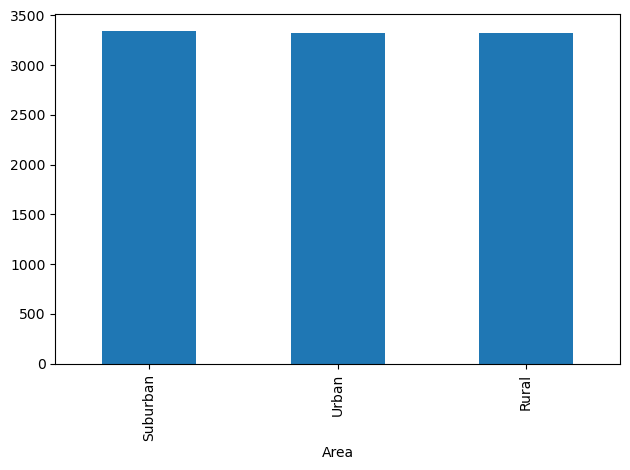

In [9]:
#check for outliers in my explanatory variables
#check for any unexpected values in the Area column using a bar chart
churn_data['Area'].value_counts().plot(kind='bar')
plt.tight_layout()

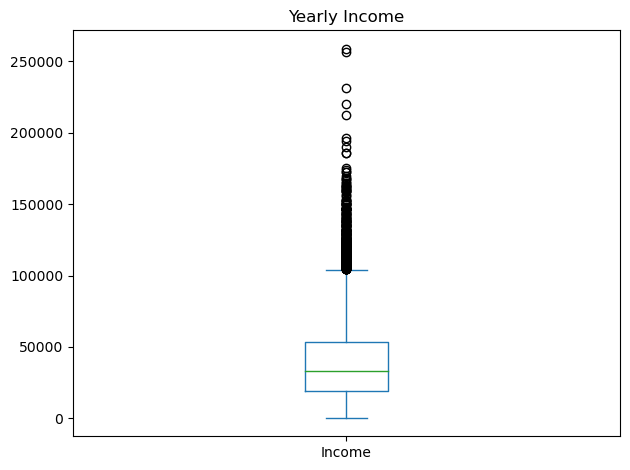

In [10]:
#check for outliers in the income column using a box plot
churn_data['Income'].plot(kind='box', title='Yearly Income')
plt.tight_layout()

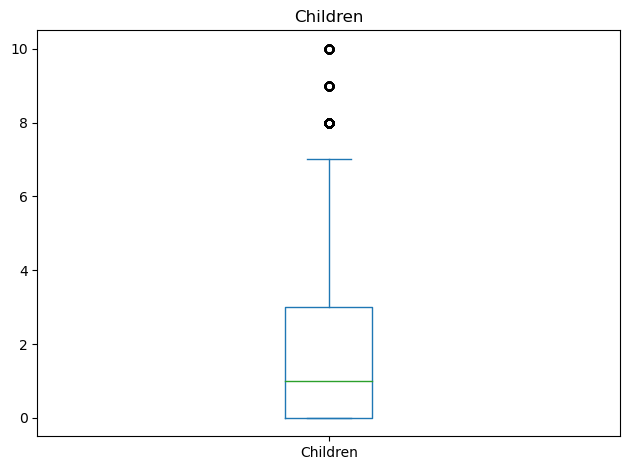

In [11]:
#check for any unexpected values in the Children column using a box plot
churn_data['Children'].plot(kind='box', title='Children')
plt.tight_layout()

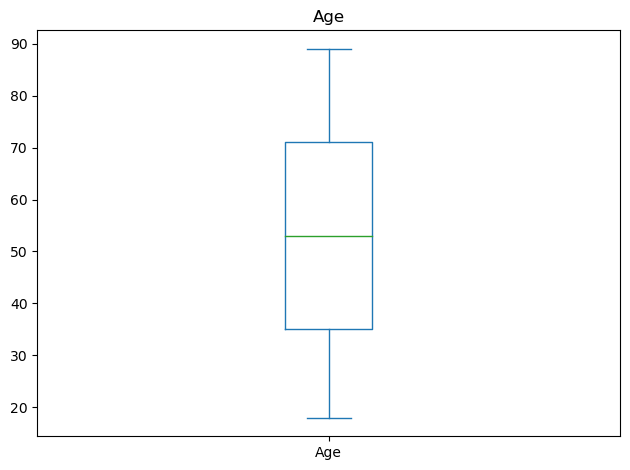

In [12]:
#Check for outliers in the Age column
churn_data['Age'].plot(kind='box', title='Age')
plt.tight_layout()

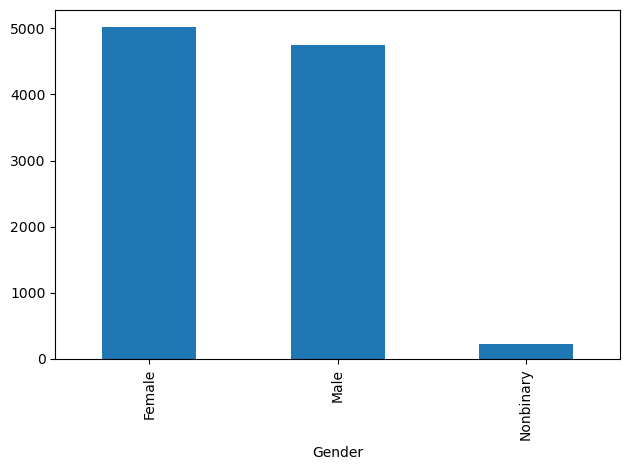

In [13]:
#check for outliers in the gender column using a bar chart
churn_data['Gender'].value_counts().plot(kind='bar')
plt.tight_layout()

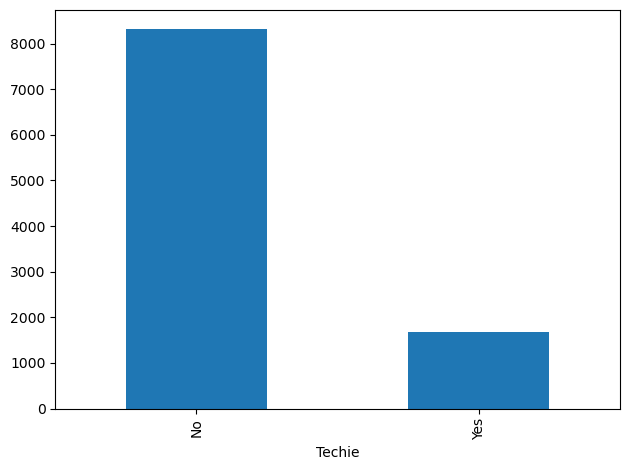

In [14]:
#check for outliers on the Techie column using a bar chart
churn_data['Techie'].value_counts().plot(kind='bar')
plt.tight_layout()

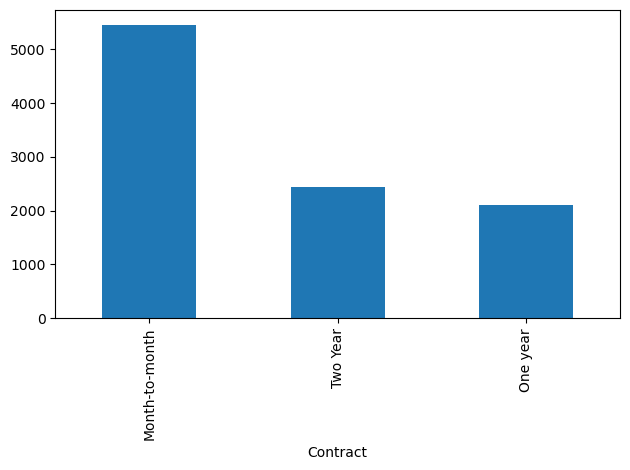

In [15]:
#check for outliers on the Contract column using a bar chart
churn_data['Contract'].value_counts().plot(kind='bar')
plt.tight_layout()

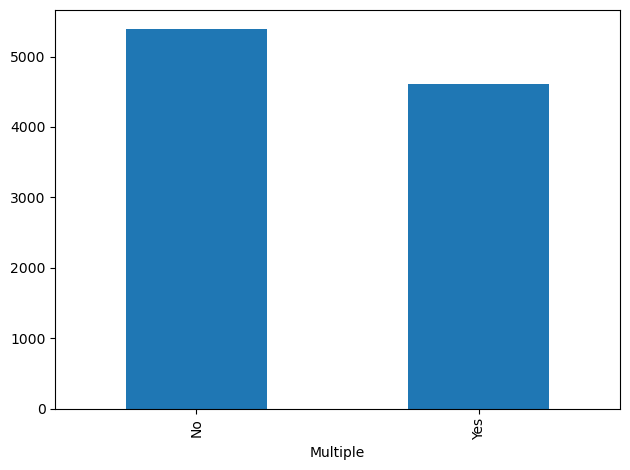

In [16]:
#check for outliers on the Contract column using a bar chart
churn_data['Multiple'].value_counts().plot(kind='bar')
plt.tight_layout()

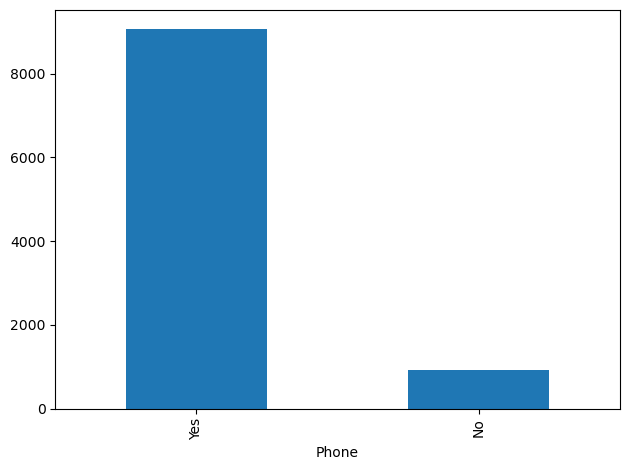

In [17]:
#check for outliers
churn_data['Phone'].value_counts().plot(kind='bar')
plt.tight_layout()

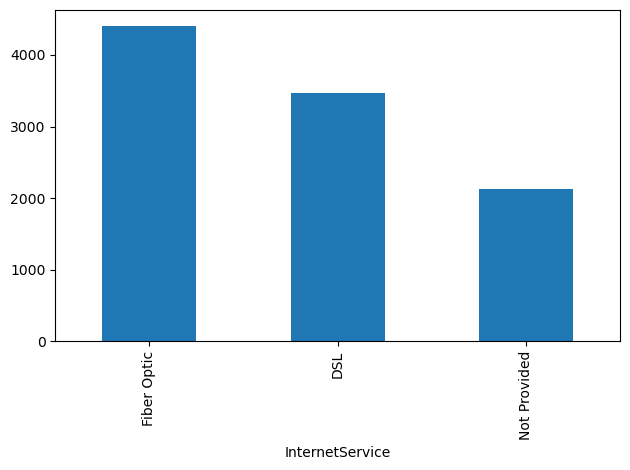

In [18]:
#check for outliers
churn_data['InternetService'].value_counts().plot(kind='bar')
plt.tight_layout()

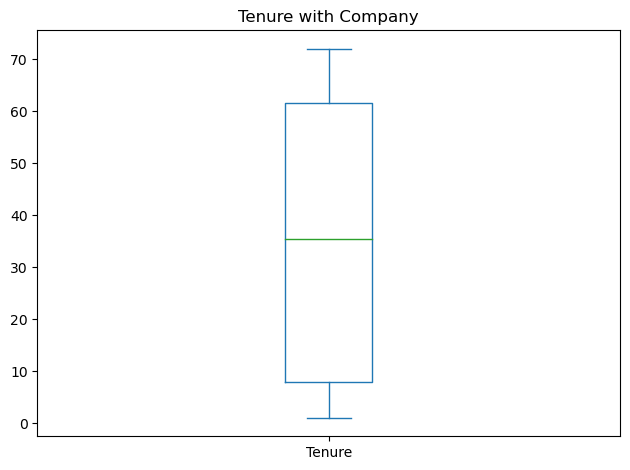

In [19]:
#check for outlieres in the Tenure column using a box chart
churn_data['Tenure'].plot(kind='box', title='Tenure with Company')
plt.tight_layout()

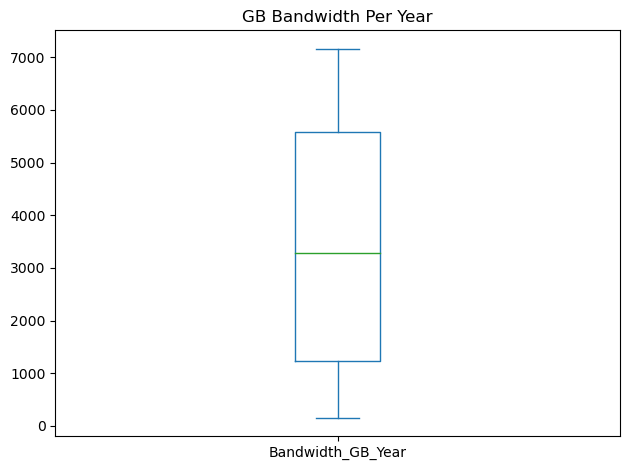

In [20]:
#check for outlieres in the Tenure column using a box chart
churn_data['Bandwidth_GB_Year'].plot(kind='box', title='GB Bandwidth Per Year')
plt.tight_layout()

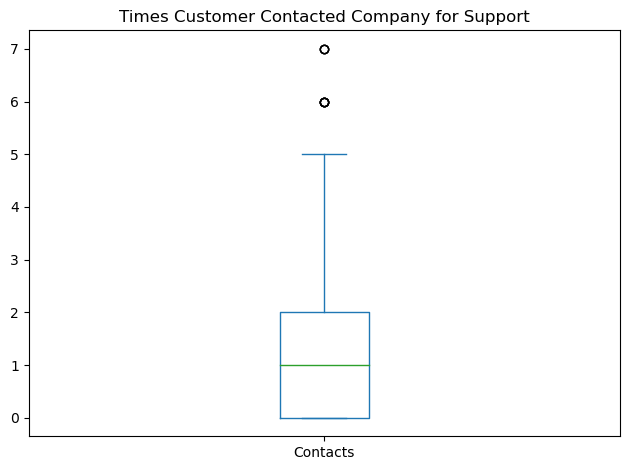

In [21]:
#check for outlieres in the Tenure column using a box chart
churn_data['Contacts'].plot(kind='box', title='Times Customer Contacted Company for Support')
plt.tight_layout()

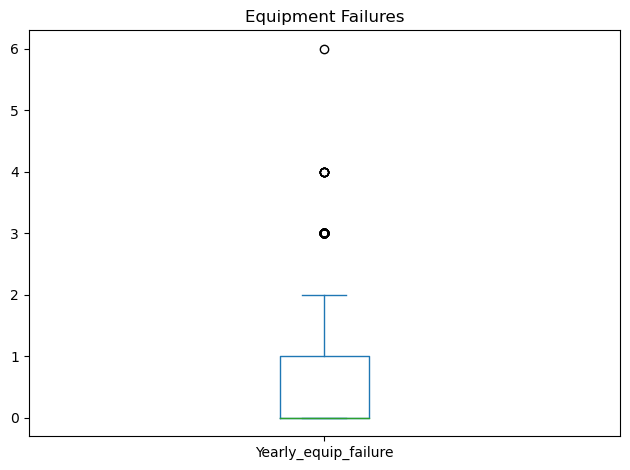

In [22]:
#check for outlieres in the Tenure column using a box chart
churn_data['Yearly_equip_failure'].plot(kind='box', title='Equipment Failures')
plt.tight_layout()

In [23]:
#Look into Equipment failure to determine outliers
outage_query = churn_data.query('Yearly_equip_failure > 2')
outage_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 8 to 9967
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             94 non-null     int64  
 1   Customer_id           94 non-null     object 
 2   Interaction           94 non-null     object 
 3   UID                   94 non-null     object 
 4   City                  94 non-null     object 
 5   State                 94 non-null     object 
 6   County                94 non-null     object 
 7   Zip                   94 non-null     int64  
 8   Lat                   94 non-null     float64
 9   Lng                   94 non-null     float64
 10  Population            94 non-null     int64  
 11  Area                  94 non-null     object 
 12  TimeZone              94 non-null     object 
 13  Job                   94 non-null     object 
 14  Children              94 non-null     int64  
 15  Age                   94 non

In [24]:
#Perform summary statistics to help understand more about the variables to be used in regression model
churn_data['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [25]:
churn_data['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [26]:
churn_data['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [27]:
churn_data['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [28]:
churn_data['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [29]:
churn_data['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [30]:
churn_data['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

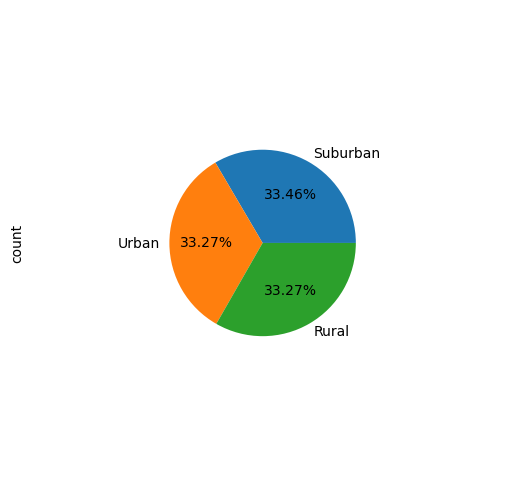

In [31]:
#Create a pie chart to show univariate visualization for the categorical variables
#These pie charts also show summary statistics for all of the categorical variables

churn_data['Area'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

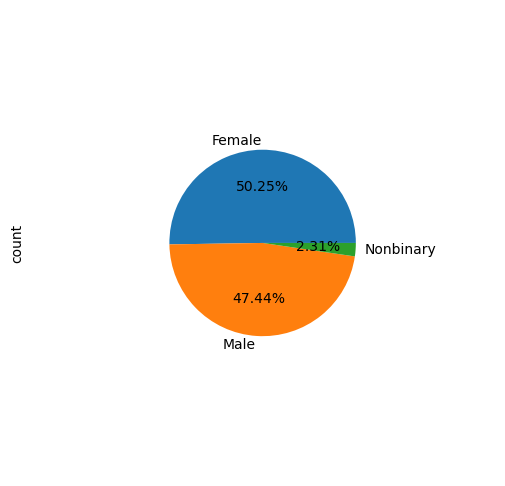

In [32]:
churn_data['Gender'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

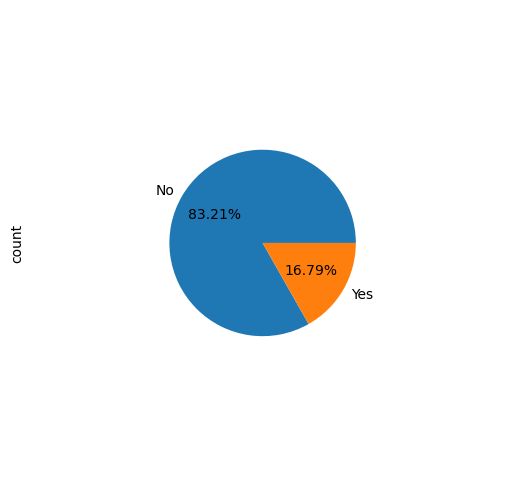

In [33]:
churn_data['Techie'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

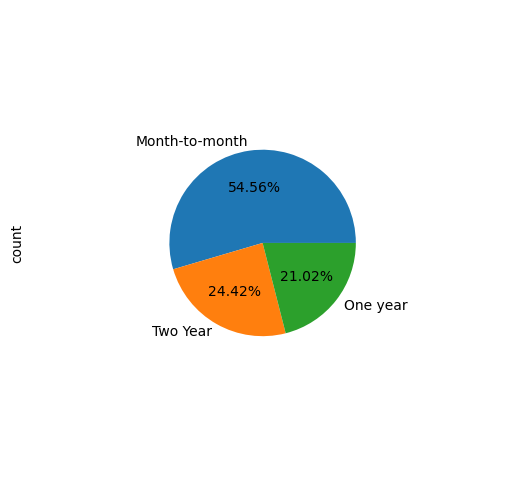

In [34]:
churn_data['Contract'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

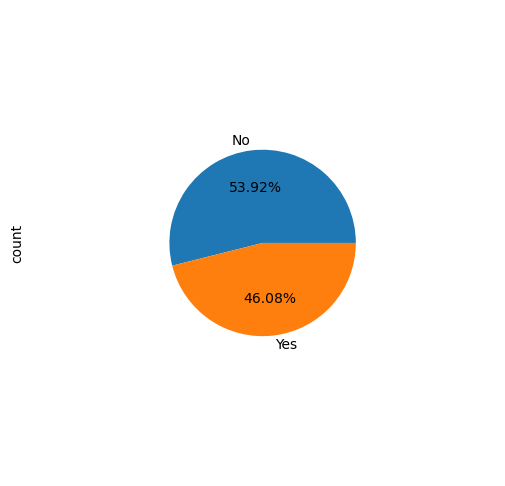

In [35]:
churn_data['Multiple'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

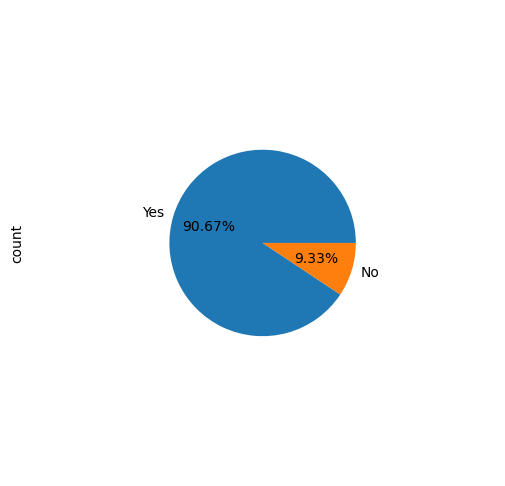

In [36]:
churn_data['Phone'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

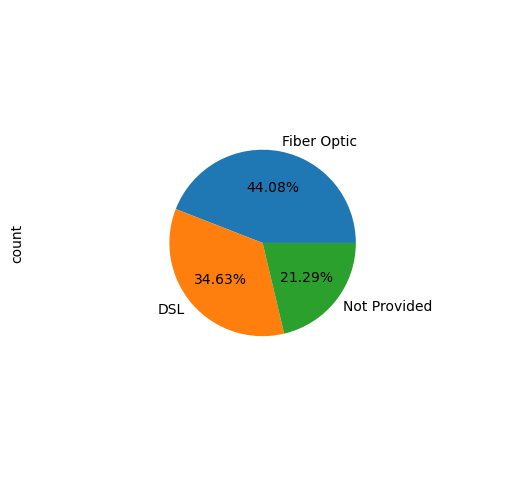

In [37]:
churn_data['InternetService'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

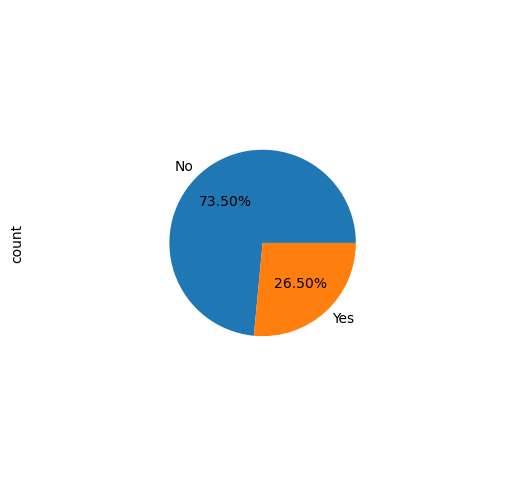

In [38]:
churn_data['Churn'].value_counts().plot(kind='pie', autopct = '%.2f%%', radius=.5)
plt.tight_layout(pad=0.5)

<Axes: xlabel='Income', ylabel='Churn'>

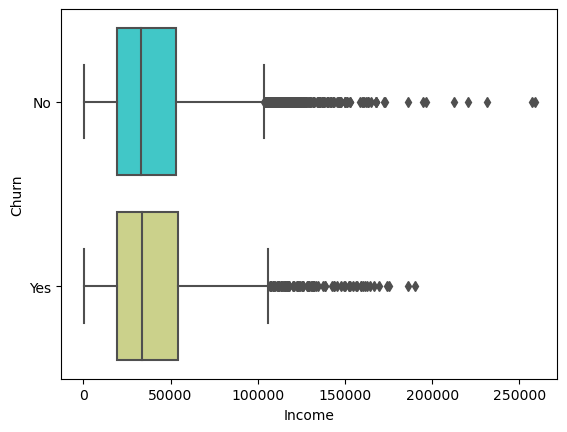

In [39]:
#Create bivariate visualizations between the target variable and all independent variables
sns.boxplot(x='Income', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Area'>

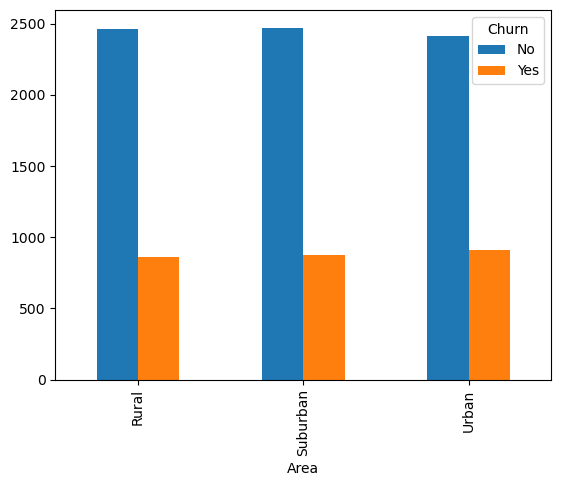

In [40]:
pd.crosstab(churn_data.Area, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Phone'>

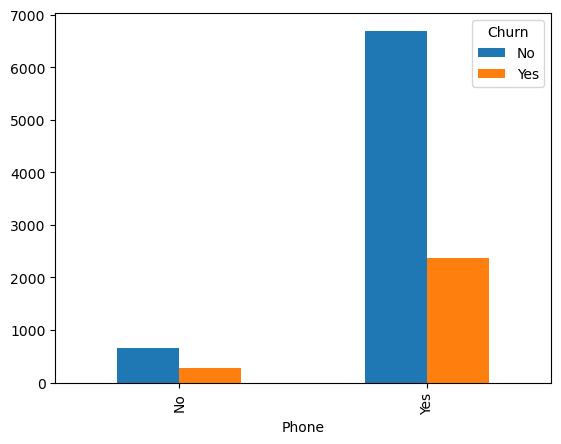

In [41]:
pd.crosstab(churn_data.Phone, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='InternetService'>

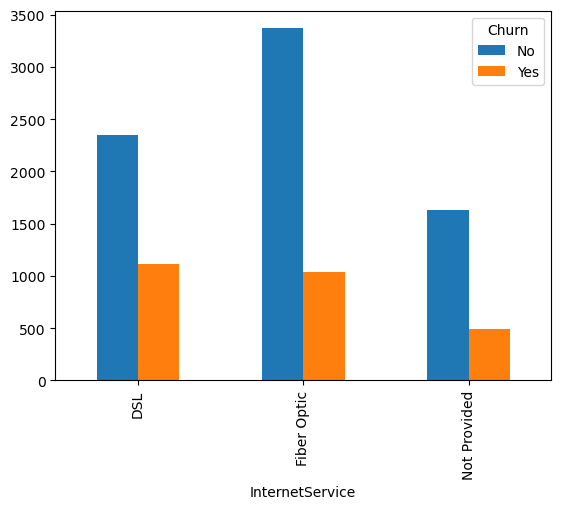

In [42]:
pd.crosstab(churn_data.InternetService, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Age', ylabel='Churn'>

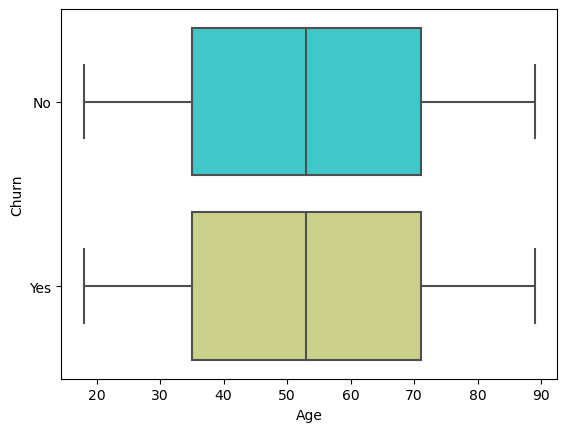

In [43]:
sns.boxplot(x='Age', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Gender'>

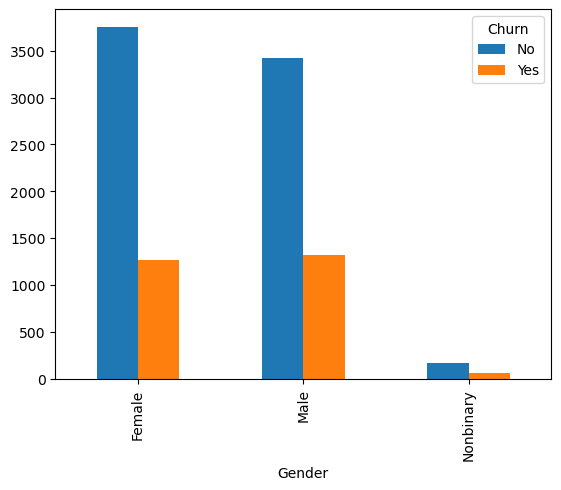

In [44]:
pd.crosstab(churn_data.Gender, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Techie'>

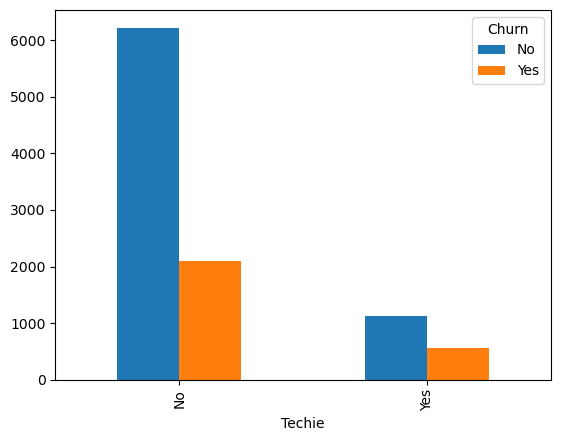

In [45]:
pd.crosstab(churn_data.Techie, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Contract'>

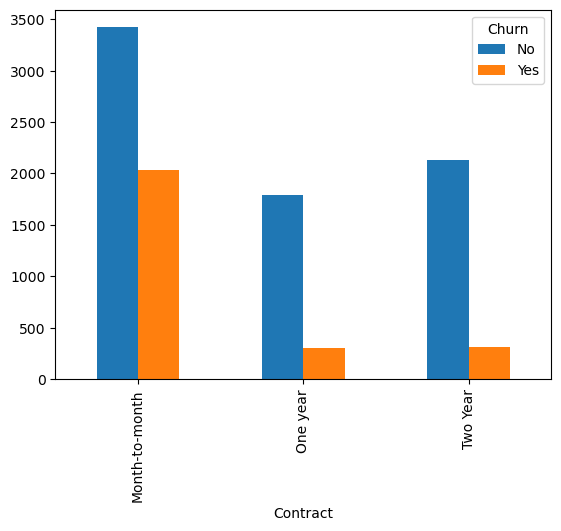

In [46]:
pd.crosstab(churn_data.Contract, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Multiple'>

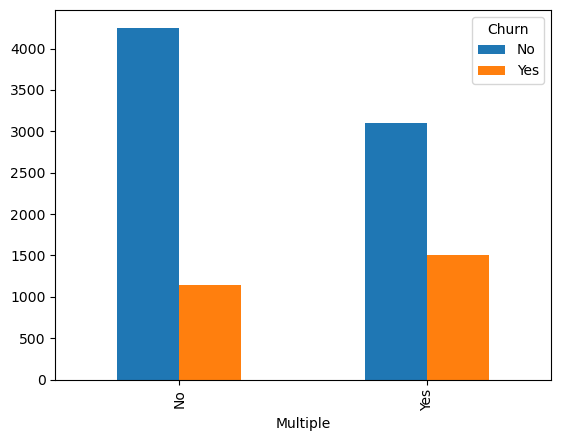

In [47]:
pd.crosstab(churn_data.Multiple, churn_data.Churn).plot(kind='bar')

<Axes: xlabel='Tenure', ylabel='Churn'>

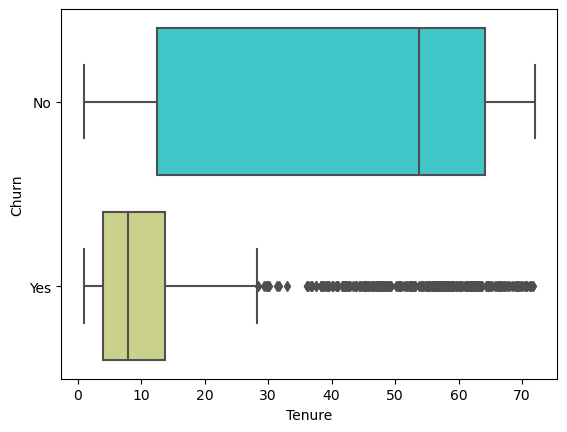

In [48]:
sns.boxplot(x='Tenure', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Churn'>

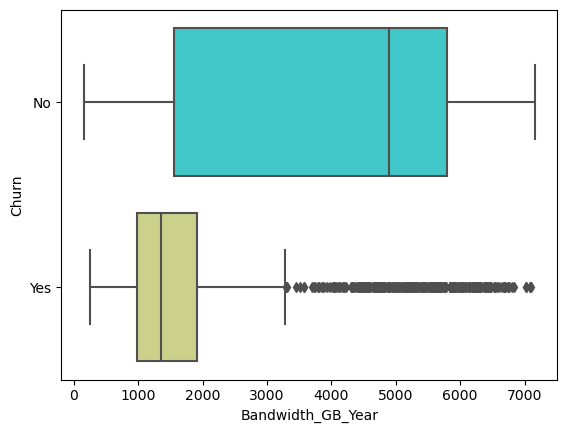

In [49]:
sns.boxplot(x='Bandwidth_GB_Year', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Contacts', ylabel='Churn'>

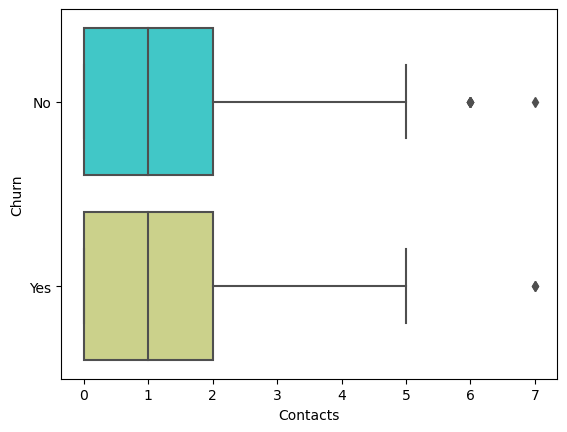

In [50]:
sns.boxplot(x='Contacts', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Yearly_equip_failure', ylabel='Churn'>

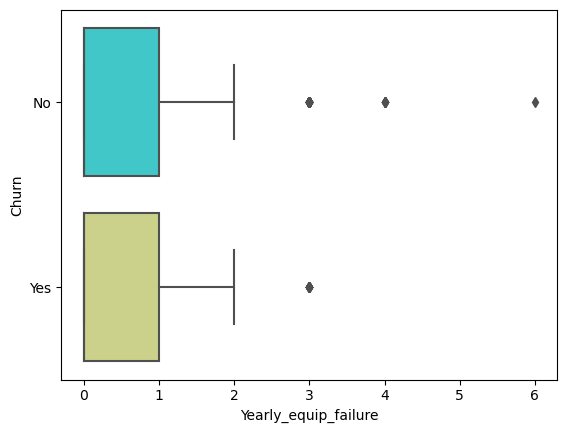

In [51]:
sns.boxplot(x='Yearly_equip_failure', y='Churn', data=churn_data, palette='rainbow')

<Axes: xlabel='Children', ylabel='Churn'>

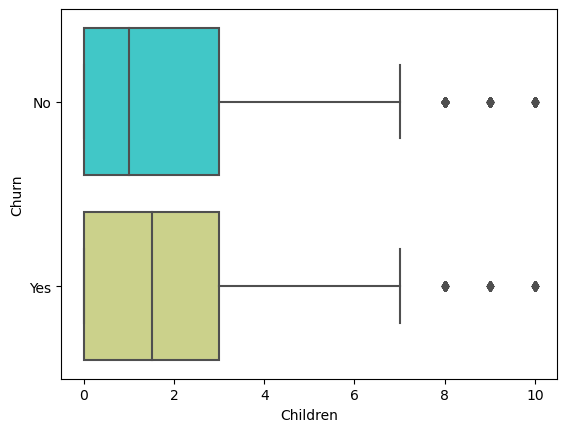

In [52]:
sns.boxplot(x='Children', y='Churn', data=churn_data, palette='rainbow')

In [53]:
#Re-expression of Categorical variables
#Re-express categorical variables for the ordinal columns

churn_data['Techie'] = churn_data['Techie'].map(
    {'Yes':1, 'No':0})
churn_data['Techie'].head(10)


0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    1
8    0
9    0
Name: Techie, dtype: int64

In [54]:
#Re-express the Multiple column
churn_data['Multiple'] = churn_data['Multiple'].map(
    {'Yes':1, 'No':0})
churn_data['Multiple'].head(10)


0    0
1    1
2    1
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Multiple, dtype: int64

In [55]:
#Re-express the dependent variable - Phone
churn_data['Phone'] = churn_data['Phone'].map(
    {'Yes':1, 'No':0})
churn_data['Phone'].head(10)


0    1
1    1
2    1
3    1
4    0
5    1
6    1
7    0
8    1
9    1
Name: Phone, dtype: int64

In [56]:
#Re-express the dependent variable - Phone
churn_data['Churn'] = churn_data['Churn'].map(
    {'Yes':1, 'No':0})
churn_data['Churn'].head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    1
8    0
9    0
Name: Churn, dtype: int64

In [57]:
#Perform one-hot encoding to re-express categorical values
#print each unique element in all columns that need one-hot encoding
print(churn_data['Area'].unique())
print(churn_data['Gender'].unique())
print(churn_data['Contract'].unique())
print(churn_data['InternetService'].unique())


['Urban' 'Suburban' 'Rural']
['Male' 'Female' 'Nonbinary']
['One year' 'Month-to-month' 'Two Year']
['Fiber Optic' 'DSL' 'Not Provided']


In [58]:
#Use get_dummies() function to encode all nominal categorical columns
#We are going to use the drop_first arguement to drop one of the hot-one columns that was created to avoid multicollinearity
churn_data = pd.get_dummies(churn_data, dtype=int, drop_first=True, columns = ['Area','Gender','Contract','InternetService'])
churn_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item7,Item8,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_Not Provided
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,3,4,0,1,1,0,1,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,4,4,0,1,0,0,0,0,1,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,3,3,0,1,0,0,0,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,3,3,1,0,1,0,0,1,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,4,5,1,0,1,0,0,0,1,0
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,3,3,0,1,0,0,1,0,0,1
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,5,5,1,0,1,0,0,0,0,0
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,4,5,1,0,0,0,0,0,0,0
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,4,4,1,0,0,1,0,0,0,0
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,3,3,0,0,0,0,0,1,1,0


In [59]:
#Save the cleaned and wrangled data to a CSV file
churn_data.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D208/Assessment 2/cleaned_wrangled_2.csv')

In [60]:
#create a dataframe to hold all independent variables
#Constant column is added to the dataframe 
x_train = pd.DataFrame(churn_data[['InternetService_Fiber Optic','InternetService_Not Provided','Area_Suburban','Area_Urban','Gender_Male','Gender_Nonbinary','Contract_One year', 'Yearly_equip_failure',
                             'Contract_Two Year', 'Children','Income','Age','Multiple','Bandwidth_GB_Year','Contacts','Tenure','Techie', 'Phone']].assign(const=1))

#create a dataframe to hold the dependent variable that is being tested
y_train = pd.DataFrame(churn_data[['Churn']])

x_train.head(5)

,InternetService_Fiber Optic,InternetService_Not Provided,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Contract_One year,Yearly_equip_failure,Contract_Two Year,Children,Income,Age,Multiple,Bandwidth_GB_Year,Contacts,Tenure,Techie,Phone,const
0,1,0,0,1,1,0,1,1,0,0,28561.99,68,0,904.536110,0,6.795513,0,1,1
1,1,0,0,1,0,0,0,1,0,1,21704.77,27,1,800.982766,0,1.156681,1,1,1
2,0,0,0,1,0,0,0,1,1,4,9609.57,50,1,2054.706961,0,15.754144,1,1,1
3,0,0,1,0,1,0,0,0,1,1,18925.23,48,0,2164.579412,2,17.087227,1,1,1
4,1,0,1,0,1,0,0,1,0,0,40074.19,83,0,271.493436,2,1.670972,0,0,1


In [61]:
logreg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.239566
         Iterations 9


In [62]:
#Print out summary table for the regression model
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5857
Time:                        21:07:55   Log-Likelihood:                -2395.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
InternetService_Fiber Optic      3.5816      0.136     26.244      0.000       3.314       3.849
InternetService_Not Provided     3.5577      0.148     24.102      0.000     

In [63]:
#Use backward elimination to produce a reduced regression model
x_train = x_train.drop(['Area_Suburban','Area_Urban','Gender_Nonbinary','Yearly_equip_failure','Income','Contacts','Phone'], axis=1)

logreg = sm.Logit(y_train, x_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.239877
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5851
Time:                        21:08:47   Log-Likelihood:                -2398.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
InternetService_Fiber Optic      3.5788      0.136     26.261      0.000

In [64]:
#Create test variables to perform predictions and create confusion matrix
x_test = pd.DataFrame(churn_data[['InternetService_Fiber Optic','InternetService_Not Provided','Gender_Male','Contract_One year',
                             'Contract_Two Year', 'Children','Age','Multiple','Bandwidth_GB_Year','Tenure','Techie']].assign(const=1))


y_test = pd.DataFrame(churn_data[['Churn']])

In [65]:
#Perform predictions on the test dataset that was created above
pred = logreg.predict(x_test)
prediction = list(map(round, pred))

In [66]:
#Create confusion Matrix
matrix = confusion_matrix(y_test, prediction)
print('Confusion Matrix: \n', matrix)

Confusion Matrix: 
 [[6858  492]
 [ 582 2068]]


<Axes: >

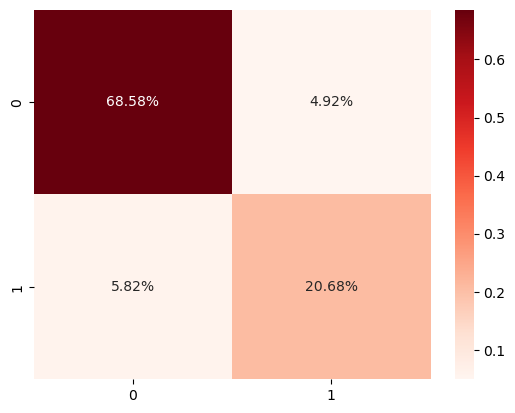

In [67]:
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

In [68]:
#Get accuracy score of the model
print('Accuracy Score:', accuracy_score(y_test, prediction))

Accuracy Score: 0.8926
